# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

In [2]:
## Importing libraries

In [64]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [65]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10736 files belonging to 8 classes.


### Validation Image Preprocessing

In [68]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3737 files belonging to 8 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [71]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [73]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [75]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [77]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [79]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [81]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [83]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [85]:
cnn.add(tf.keras.layers.Flatten())

In [87]:
cnn.add(tf.keras.layers.Dense(units=150,activation='relu'))

In [89]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [91]:
#Output Layer
cnn.add(tf.keras.layers.Dense(8, activation='softmax'))

### Compiling and Training Phase

In [93]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [94]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 150)                 │         307,350 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │           1,208 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,020,782 (19.15 MB)

 Trainable params: 5,020,782 (19.15 MB)

 Non-trainable params: 0 (0.00 B)

In [97]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 1020s 3s/step - accuracy: 0.4088 - loss: 1.5744 - val_accuracy: 0.6486 - val_loss: 0.9627
Epoch 2/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 777s 2s/step - accuracy: 0.7779 - loss: 0.6474 - val_accuracy: 0.7669 - val_loss: 0.6570
Epoch 3/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 678s 2s/step - accuracy: 0.8623 - loss: 0.3972 - val_accuracy: 0.7728 - val_loss: 0.6160
Epoch 4/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 669s 2s/step - accuracy: 0.8778 - loss: 0.3511 - val_accuracy: 0.8210 - val_loss: 0.5067
Epoch 5/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 669s 2s/step - accuracy: 0.9078 - loss: 0.2731 - val_accuracy: 0.8333 - val_loss: 0.4945
Epoch 6/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 662s 2s/step - accuracy: 0.9301 - loss: 0.2026 - val_accuracy: 0.8518 - val_loss: 0.4564
Epoch 7/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 704s 2s/step - accuracy: 0.9379 - loss: 0.1810 - val_accuracy: 0.9055 - val_loss: 0.2786
Epoch 8/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 830s 2s/step - accuracy: 0.9491 - loss: 0.1617 - val_acc

## Evaluating Model

In [99]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

336/336 ━━━━━━━━━━━━━━━━━━━━ 178s 511ms/step - accuracy: 0.9872 - loss: 0.0454
Training accuracy: 0.9876117706298828


In [101]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

117/117 ━━━━━━━━━━━━━━━━━━━━ 60s 507ms/step - accuracy: 0.9071 - loss: 0.3034
Validation accuracy: 0.9068771600723267


### Saving Model

In [103]:
cnn.save('trained_plant_disease_model.keras')

In [105]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5530924201011658,
  0.8019746541976929,
  0.8709948062896729,
  0.8904619812965393,
  0.9137481451034546,
  0.9356371164321899,
  0.9402943253517151,
  0.9553837776184082,
  0.9583643674850464,
  0.9649776220321655],
 'loss': [1.2268331050872803,
  0.575776994228363,
  0.3772706985473633,
  0.3169419765472412,
  0.2548072338104248,
  0.19055095314979553,
  0.17309445142745972,
  0.13855098187923431,
  0.12034959346055984,
  0.10336203873157501],
 'val_accuracy': [0.6486486196517944,
  0.7669253349304199,
  0.7728124260902405,
  0.8209794163703918,
  0.8332887291908264,
  0.851752758026123,
  0.9055392146110535,
  0.9157077670097351,
  0.8916242718696594,
  0.9068771600723267],
 'val_loss': [0.9627092480659485,
  0.656997799873352,
  0.6159777045249939,
  0.5066576600074768,
  0.4944608211517334,
  0.4563889503479004,
  0.2785724103450775,
  0.25777941942214966,
  0.3506820499897003,
  0.30367612838745117]}

In [107]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [109]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

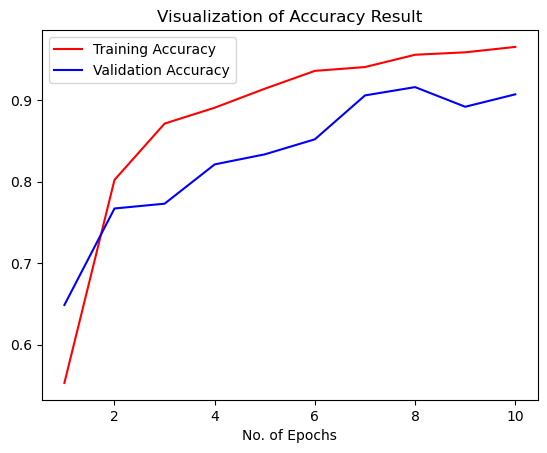

In [111]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [113]:
class_name = validation_set.class_names

In [115]:
val_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3737 files belonging to 8 classes.


In [119]:
y_pred = cnn.predict(val_set)
predicted_categories = tf.argmax(y_pred, axis=1)

3737/3737 ━━━━━━━━━━━━━━━━━━━━ 133s 34ms/step


In [123]:
true_categories = tf.concat([y for x, y in val_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [125]:
Y_true

<tf.Tensor: shape=(3737,), dtype=int64, numpy=array([0, 0, 0, ..., 7, 7, 7], dtype=int64)>

In [127]:
predicted_categories

<tf.Tensor: shape=(3737,), dtype=int64, numpy=array([0, 0, 0, ..., 7, 7, 7], dtype=int64)>

In [130]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [132]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                               precision    recall  f1-score   support

                           Apple___Apple_scab       0.99      0.70      0.82       504
                            Apple___Black_rot       0.95      0.93      0.94       497
                           Tomato___Leaf_Mold       0.81      0.99      0.89       470
                  Tomato___Septoria_leaf_spot       0.82      0.76      0.79       436
Tomato___Spider_mites Two-spotted_spider_mite       0.92      0.96      0.94       435
                         Tomato___Target_Spot       0.90      0.93      0.92       457
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.99      0.99      0.99       490
                 Tomato___Tomato_mosaic_virus       0.91      1.00      0.95       448

                                     accuracy                           0.91      3737
                                    macro avg       0.91      0.91      0.90      3737
                                 weighted

### Confusion Matrix Visualization

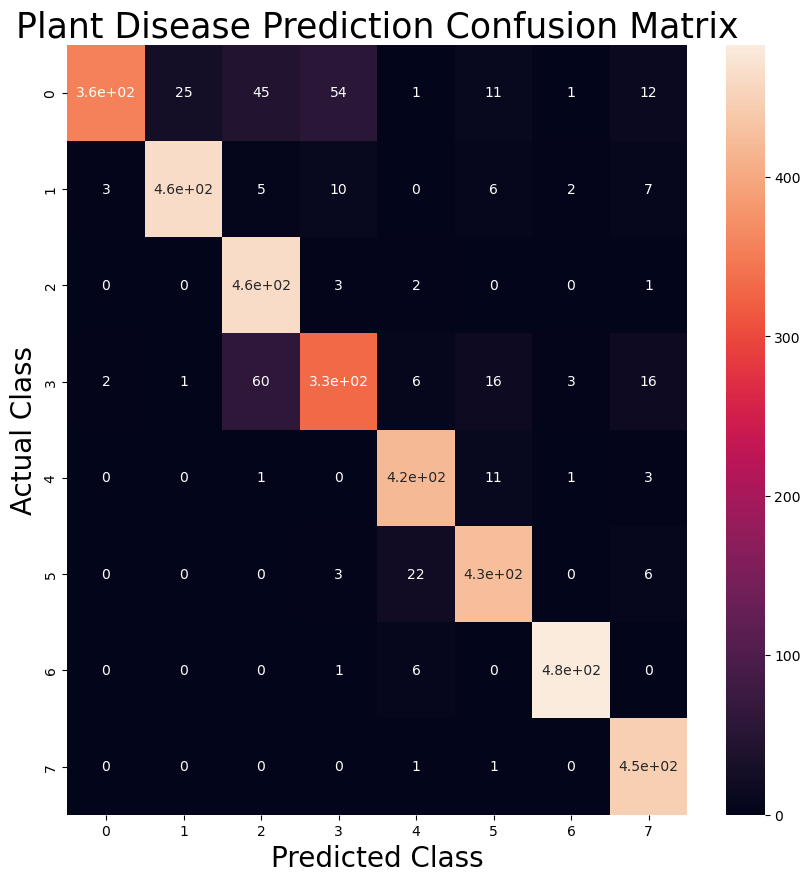

In [137]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()